## Exploratory Data Analysis for Student attrition

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [14]:
df = pd.read_excel("Student Applications & Performance.xlsx", sheet_name = 'University information', engine='openpyxl')

In [15]:
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,1150.0,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN,200802,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,ITDS 2749,A,NaN,NaN,NaN,NaN,On Campus,0,150.0,4.00,SCHOOL 50,NaN,No Information,NaN,No Information,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,1190.0,200808,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A,200902,ECON 2105,A,ENGL 1102,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.0,2.89,SCHOOL 389,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,1030.0,201008,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN,201102,ENGL 1102,A,ENVS 1105,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,150.0,3.39,SCHOOL 82,2.0,High School,4.0,Other/Unknown,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,1220.0,200708,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802,ENGL 1102,A,HIST 2112,A,LEAD 1705,A,MUSC 1100,A,NaN,NaN,NaN,NaN,On Campus,1,150.0,2.93,SCHOOL 180,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,1190.0,200808,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN,200902,COMM 1110,A,ENGL 1101,A,HIST 2111,A,PSYC 1101,A,NaN,NaN,NaN,NaN,Off Campus,1,69.0,3.86,SCHOOL 2,3.0,College/Beyond,2.0,High School,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


<AxesSubplot:>

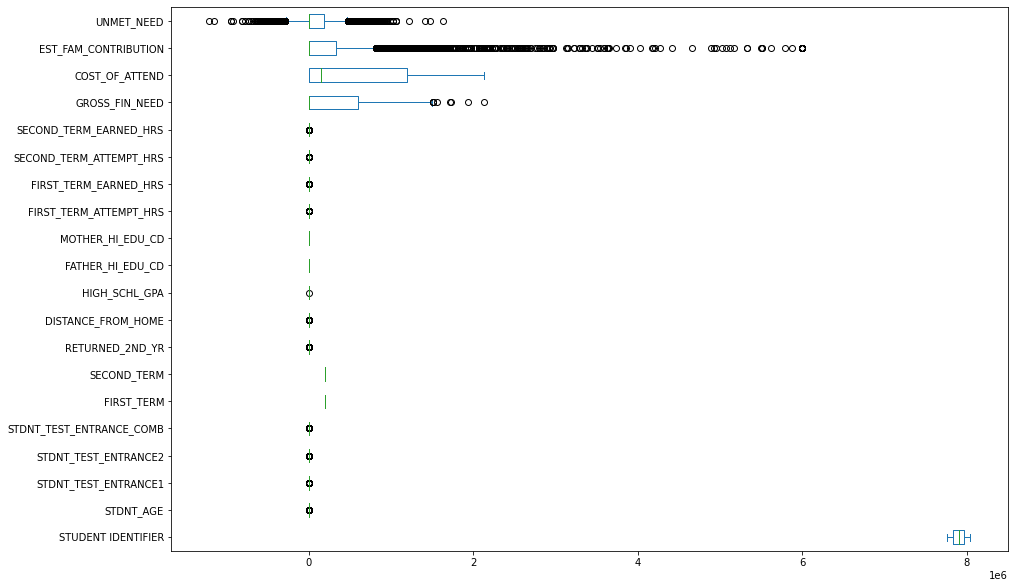

In [16]:
#Plotting 'Box Plot' to find outliers
df.plot(kind='box',vert=False, figsize=(15, 10))

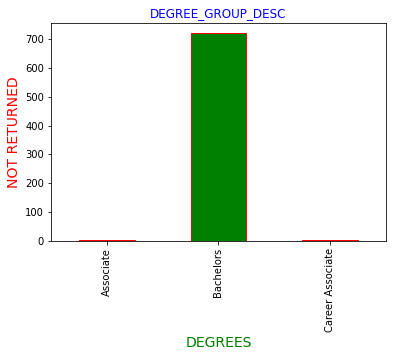

In [20]:
# plotting Degree against NoN returned Students
df1 = df[df['RETURNED_2ND_YR']==0]
plt.clf()
# Only Bachelor degree taken more drop out
df1.groupby('DEGREE_GROUP_DESC')['RETURNED_2ND_YR'].count().plot(kind='bar', color='g', edgecolor='r')
plt.xlabel('DEGREES', color='g', fontsize=14)
plt.ylabel('NOT RETURNED', color='red', fontsize=14)
plt.title('DEGREE_GROUP_DESC', color='blue')
plt.savefig('figure1.png')

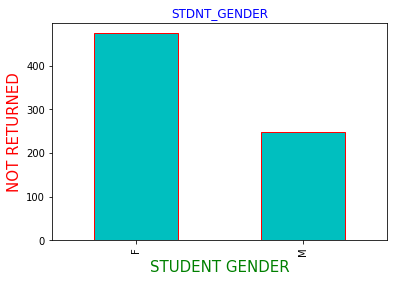

In [18]:
# More Female student go drop out
plt.clf()
df1.groupby('STDNT_GENDER')['RETURNED_2ND_YR'].count().plot(kind='bar', color='c', edgecolor='r')
plt.xlabel('STUDENT GENDER', color='g', fontsize=15)
plt.ylabel('NOT RETURNED', color='red', fontsize=15)   #WKYC
plt.title('STDNT_GENDER', color='blue')
plt.show()

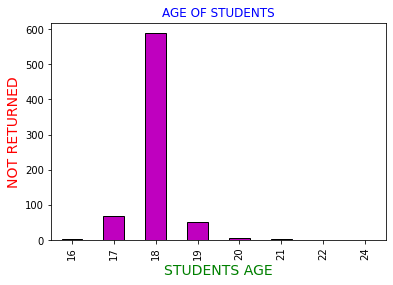

In [8]:
# Below age 18 group caused the student attrition
plt.clf()
df1.groupby('STDNT_AGE')['RETURNED_2ND_YR'].count().plot(kind='bar', color='m', edgecolor='k')
plt.xlabel('STUDENTS AGE', color='g', fontsize=14)
plt.ylabel('NOT RETURNED', color='red', fontsize=14)
plt.title('AGE OF STUDENTS', color='blue')
plt.show()

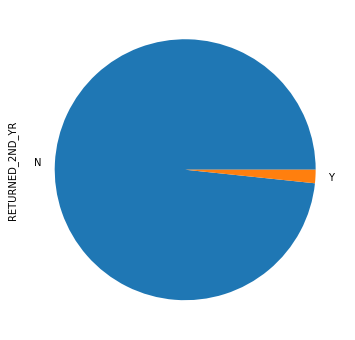

In [9]:
# There is only few international student are droped out here
plt.clf()
df1.groupby('INTERNATIONAL_STS')['RETURNED_2ND_YR'].count().plot(kind='pie', figsize=(10, 6))
plt.show()

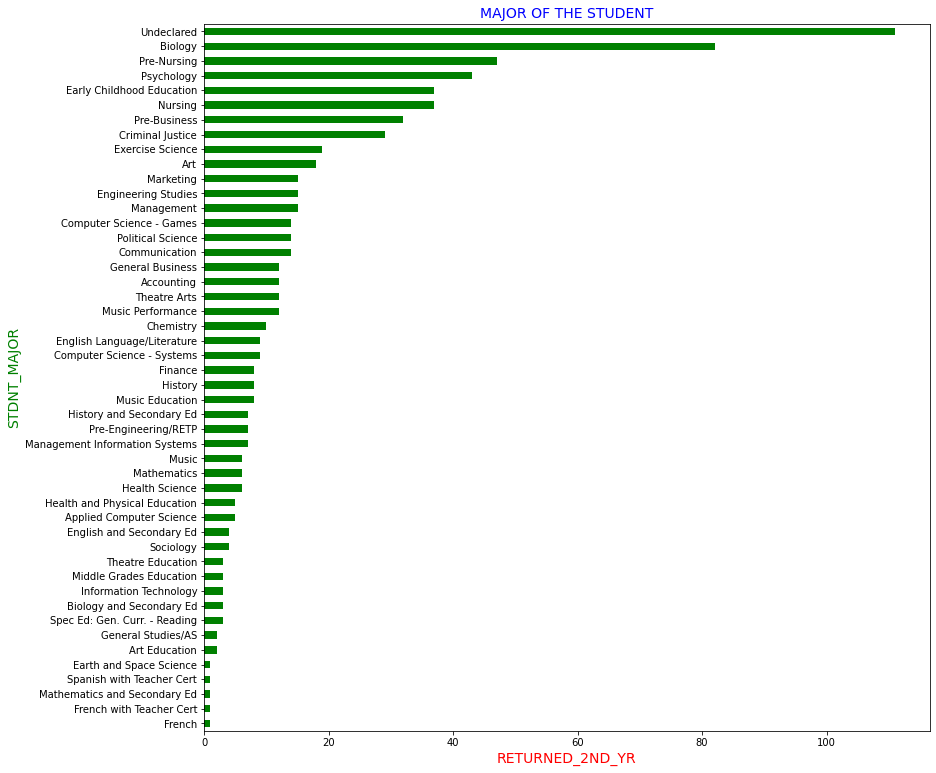

In [10]:
# Biology, Pre Nursing and Psychology background got more attrition
plt.clf()
df1.groupby('STDNT_MAJOR')['RETURNED_2ND_YR'].count().sort_values(ascending=True).plot(kind='barh', figsize=(13, 13), color='g')
plt.title('MAJOR OF THE STUDENT', fontsize=14, color='blue')
plt.xlabel('RETURNED_2ND_YR', fontsize=14, color='red')
plt.ylabel('STDNT_MAJOR', fontsize=14, color='green')
plt.show()

In [11]:
categoricals = [feature for feature in df.columns if df[feature].dtype=='O' and feature != 'RETURNED_2ND_YR']

In [12]:
categoricals

['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_NAME_4_F',
 'CORE_COURSE_GRADE_4_F',
 'CORE_COURSE_NAME_5_F',
 'CORE_COURSE_GRADE_5_F',
 'CORE_COURSE_NAME_6_F',
 'CORE_COURSE_GRADE_6_F',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_NAME_2_S',
 'CORE_COURSE_GRADE_2_S',
 'CORE_COURSE_NAME_3_S',
 'CORE_COURSE_GRADE_3_S',
 'CORE_COURSE_NAME_4_S',
 'CORE_COURSE_GRADE_4_S',
 'CORE_COURSE_NAME_5_S',
 'CORE_COURSE_GRADE_5_S',
 'CORE_COURSE_NAME_6_S',
 'CORE_COURSE_GRADE_6_S',
 'HOUSING_STS',
 'HIGH_SCHL_NAME',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC']

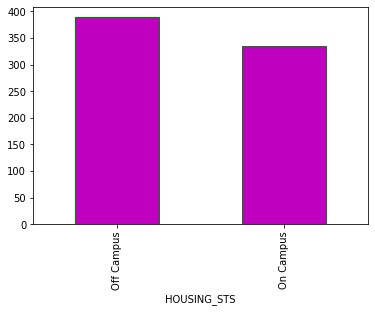

In [13]:
# The day scolar student are having most dropped out when compared to hostellers
plt.clf()
df1.groupby('HOUSING_STS')['RETURNED_2ND_YR'].count().plot(kind='bar', color='m', edgecolor='g')
plt.show()

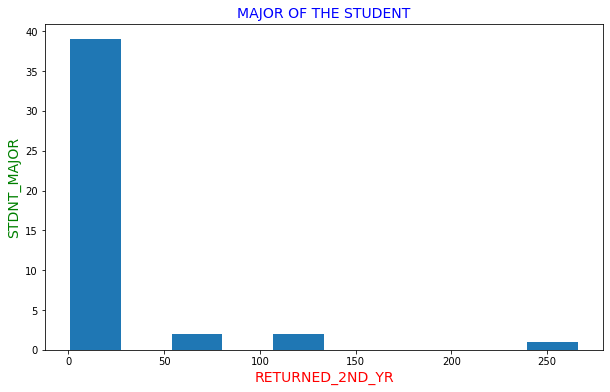

In [14]:
# More Distance from home is not causing got more student attrition
plt.clf()
df1.groupby('DISTANCE_FROM_HOME')['RETURNED_2ND_YR'].count().plot(kind='hist', figsize=(10, 6))
plt.title('MAJOR OF THE STUDENT', fontsize=14, color='blue')
plt.xlabel('RETURNED_2ND_YR', fontsize=14, color='red')
plt.ylabel('STDNT_MAJOR', fontsize=14, color='green')
plt.show()

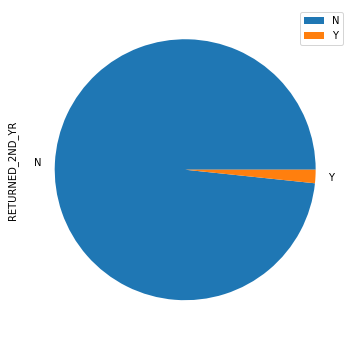

In [51]:
# There is no only few other State students dropped out
plt.clf()
df1.groupby('INTERNATIONAL_STS')['RETURNED_2ND_YR'].count().plot(kind='pie', figsize=(10, 6))
plt.legend()
plt.show()

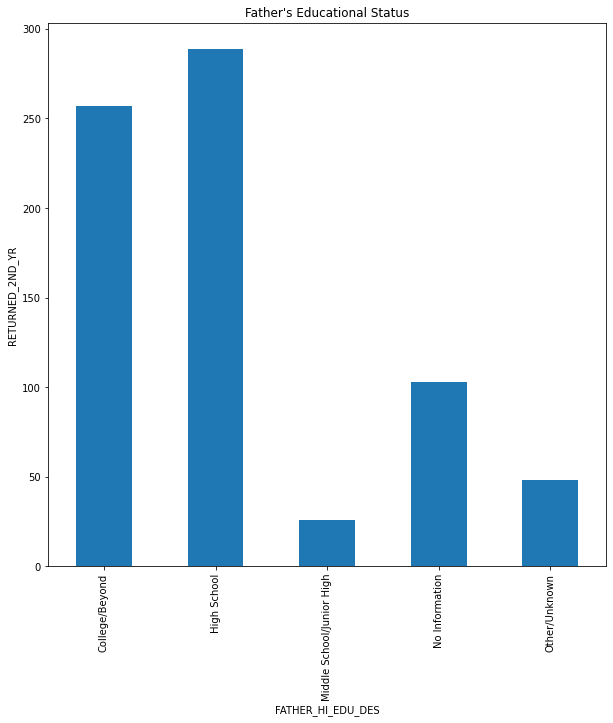

In [16]:
## father's education is more than the High school are causing the Student Attrition
plt.clf()
df1.groupby('FATHER_HI_EDU_DESC')['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 10))
plt.title("Father's Educational Status")
plt.xlabel('FATHER_HI_EDU_DES')
plt.ylabel('RETURNED_2ND_YR')
plt.show()

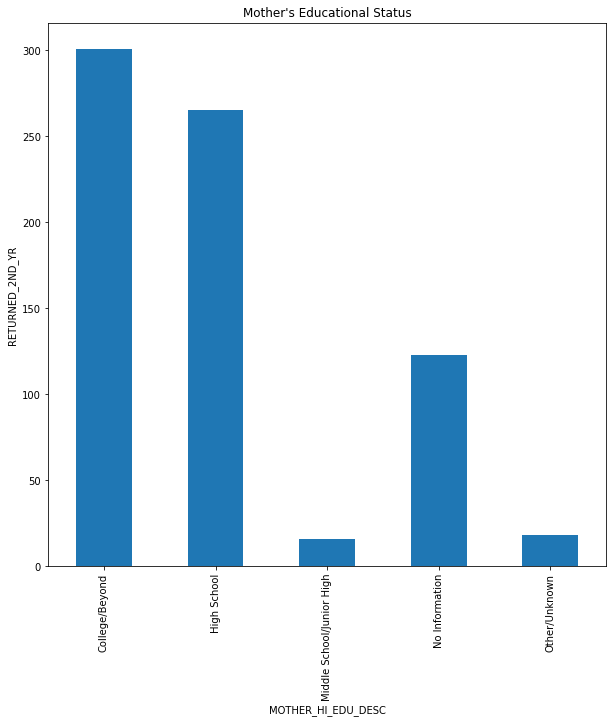

In [17]:
# father's education is more than the High school are causing the Student Attrition
plt.clf()
df1.groupby('MOTHER_HI_EDU_DESC')['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 10))
plt.title("Mother's Educational Status")
plt.xlabel('MOTHER_HI_EDU_DESC')
plt.ylabel('RETURNED_2ND_YR')
plt.show()

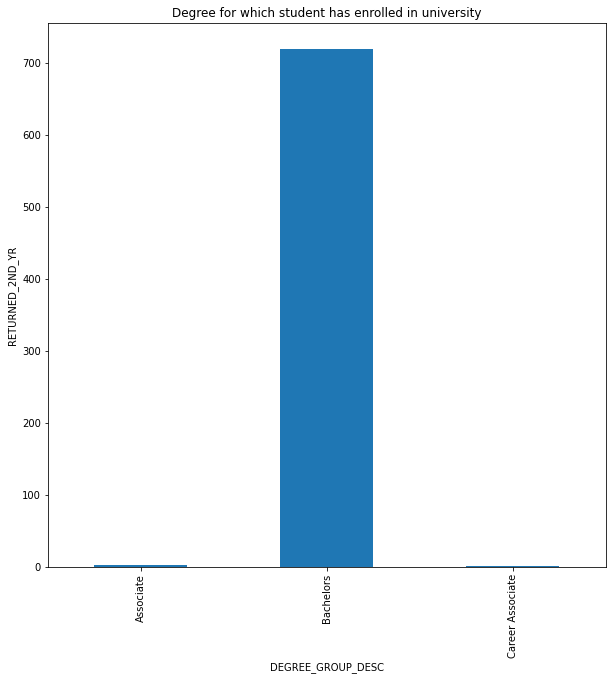

In [18]:
plt.clf()
df1.groupby('DEGREE_GROUP_DESC')['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 10))
plt.title("Degree for which student has enrolled in university")
plt.xlabel('DEGREE_GROUP_DESC')
plt.ylabel('RETURNED_2ND_YR')
plt.show()

<AxesSubplot:ylabel='Frequency'>

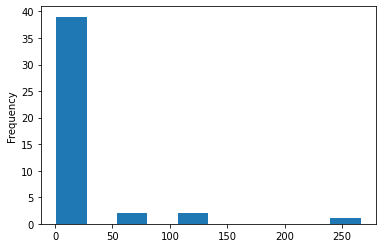

In [19]:
# More Distance from home is not causing got more student attrition
plt.clf()
df1.groupby('DISTANCE_FROM_HOME')['RETURNED_2ND_YR'].count().plot(kind='hist')

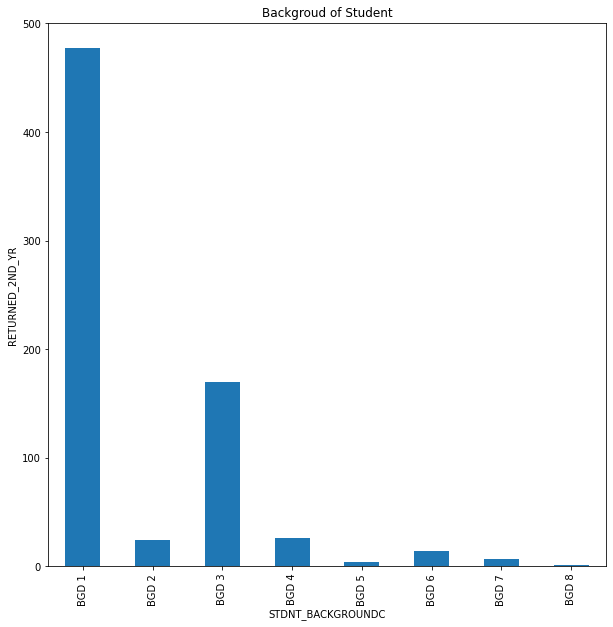

In [20]:
# BGD1 and BGD2 Causing the More Attrition
plt.clf()
df1.groupby('STDNT_BACKGROUND')['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 10))
plt.title("Backgroud of Student")
plt.xlabel('STDNT_BACKGROUNDC')
plt.ylabel('RETURNED_2ND_YR')
plt.show()

C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


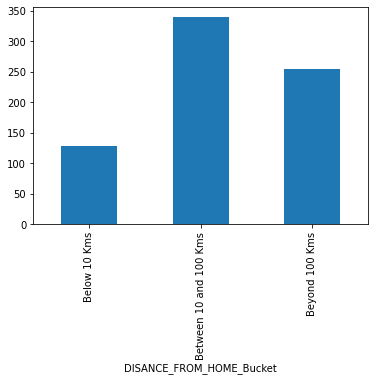

In [21]:
# Distance from Home is not causing more student Attrition
def dis_check(DISTANCE_FROM_HOME):
    if DISTANCE_FROM_HOME < 10:
        f = 'Below 10 Kms'
    elif DISTANCE_FROM_HOME >= 10 and DISTANCE_FROM_HOME < 100:
        f = 'Between 10 and 100 Kms'
    else:
        f = 'Beyond 100 Kms'
    return f

df1['DISANCE_FROM_HOME_Bucket'] = df1.apply(lambda x: dis_check(x['DISTANCE_FROM_HOME']), axis=1)
df1.groupby('DISANCE_FROM_HOME_Bucket')['RETURNED_2ND_YR'].count().plot(kind='bar')
plt.show()
# Student distance is more than 10 km has more attrition

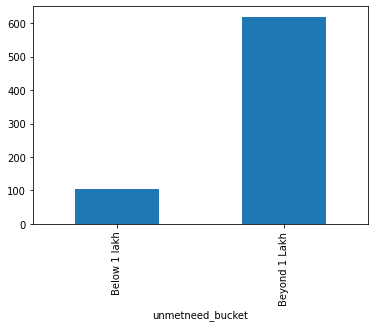

In [23]:
## plot shows who has more financial need has more attrition
def unmetneed_bucket(UNMET_NEED):
    if UNMET_NEED < -100000:
        f = 'Below 1 lakh'
    else:
        f = 'Beyond 1 Lakh'
    return f
df1['unmetneed_bucket'] = df1.apply(lambda x: unmetneed_bucket(x['UNMET_NEED']), axis=1)

df1.groupby('unmetneed_bucket')['RETURNED_2ND_YR'].count().plot(kind='bar')
plt.show()

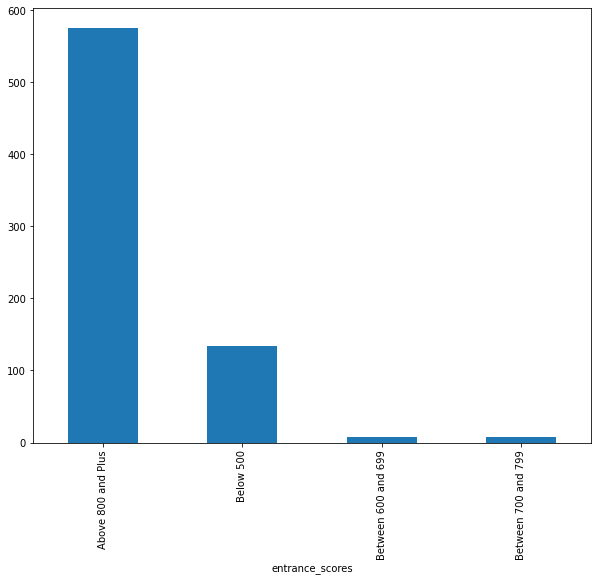

In [33]:
# Student who got entrance mart below 500 and above 800 has the more attrition
def entrance_check(STDNT_TEST_ENTRANCE_COMB):
    if STDNT_TEST_ENTRANCE_COMB >= 800:
        f = 'Above 800 and Plus'
    elif STDNT_TEST_ENTRANCE_COMB >=700:
        f = 'Between 700 and 799'
    elif STDNT_TEST_ENTRANCE_COMB >= 600:
        f = 'Between 600 and 699'
    else:
        f = 'Below 500'
    return f

df1['entrance_scores'] = df1.apply(lambda x: entrance_check(x['STDNT_TEST_ENTRANCE_COMB']), axis=1)
df1.groupby('entrance_scores')['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 8))
plt.show()

C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='year'>

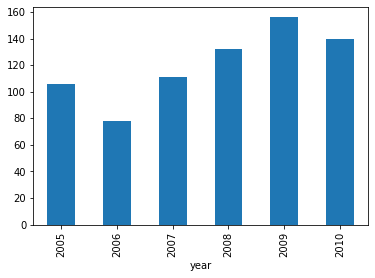

In [39]:
## every year attrition is increasing 
df1['year'] = df['FIRST_TERM'].map(str).replace(['200508', '200608', '200708', '200808', '200908', '201008'], ['2005', '2006', '2007', '2008', '2009', '2010'])
df1.groupby('year')['RETURNED_2ND_YR'].count().plot(kind='bar')

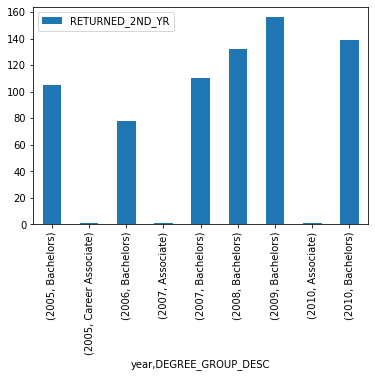

In [50]:
## every year Bachelor Causing more attrition
df1.groupby(['year','DEGREE_GROUP_DESC'])['RETURNED_2ND_YR'].count().plot(kind='bar')
plt.legend()

<AxesSubplot:xlabel='year,STDNT_AGE'>

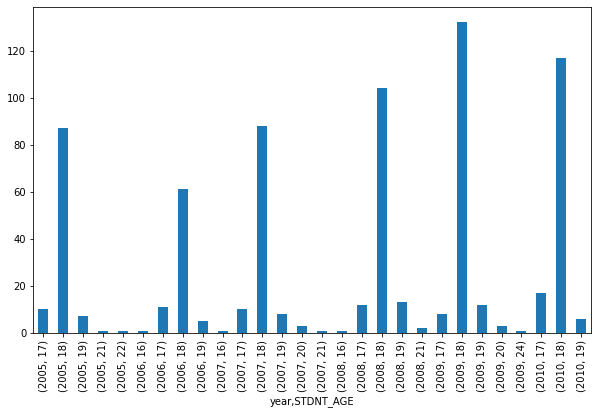

In [42]:
df1.groupby(['year','STDNT_AGE'])['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 6))

<AxesSubplot:xlabel='year,STDNT_GENDER'>

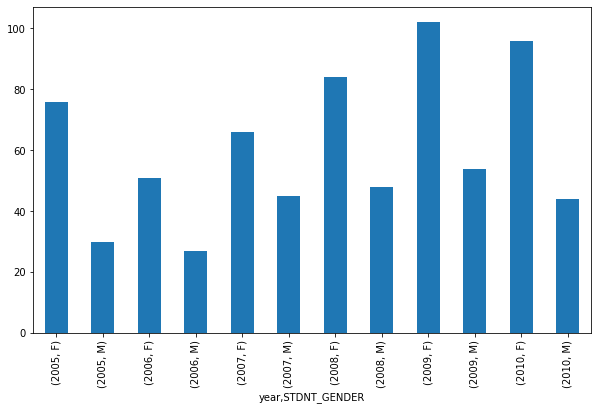

In [43]:
## year by year Female has more dropped out when compared to males
df1.groupby(['year','STDNT_GENDER'])['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 6))

<AxesSubplot:xlabel='year,HOUSING_STS'>

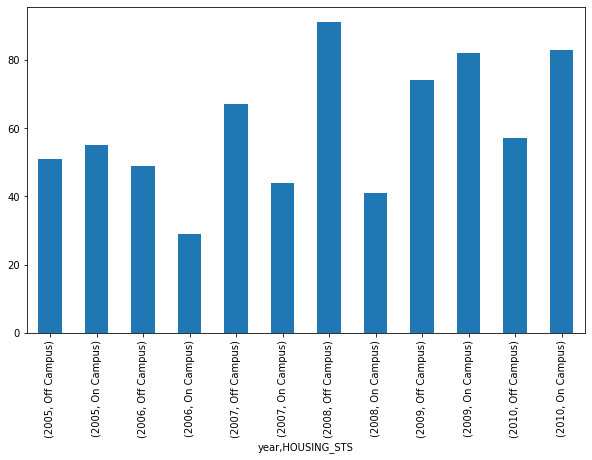

In [48]:
## Every year half Campus Students got more attrition
## 2009 2010 On campus Students more dropped out..so there is some facilities is missing in the college or hostel
df1.groupby(['year','HOUSING_STS'])['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 6))

<AxesSubplot:xlabel='first_term_fall_hrs'>

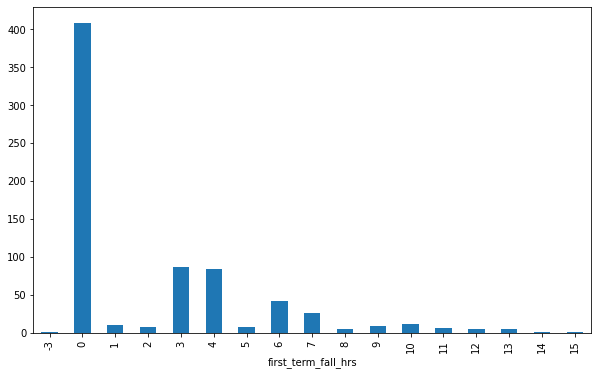

In [45]:
df1['first_term_fall_hrs'] = df['FIRST_TERM_ATTEMPT_HRS']-df['FIRST_TERM_EARNED_HRS']
df1.groupby('first_term_fall_hrs')['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 6))

In [ ]:
FATHER_HI_EDU_DESC

<AxesSubplot:xlabel='year,FATHER_HI_EDU_DESC'>

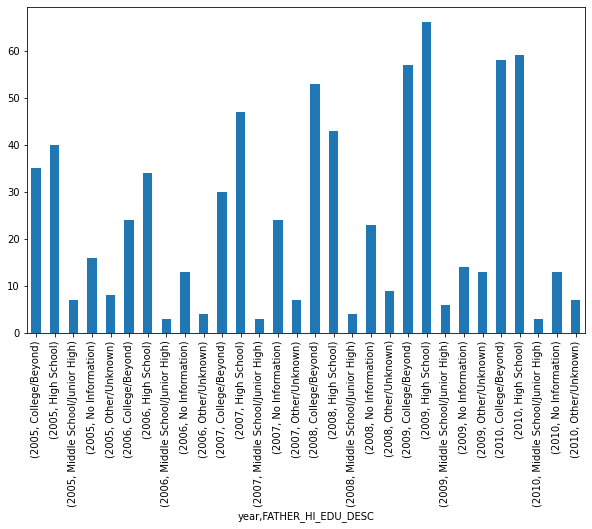

In [53]:
df1.groupby(['year','FATHER_HI_EDU_DESC'])['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 6))

<AxesSubplot:xlabel='year,DEGREE_GROUP_CD'>

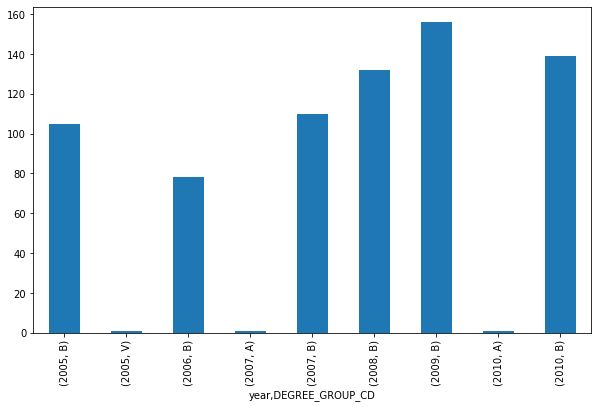

In [54]:
df1.groupby(['year','DEGREE_GROUP_CD'])['RETURNED_2ND_YR'].count().plot(kind='bar', figsize=(10, 6))

In [55]:
Numericals = [feature for feature in df.columns if df[feature].dtype!='O' and feature != 'RETURNED_2ND_YR']

In [56]:
Numericals

['STUDENT IDENTIFIER',
 'STDNT_AGE',
 'STDNT_TEST_ENTRANCE1',
 'STDNT_TEST_ENTRANCE2',
 'STDNT_TEST_ENTRANCE_COMB',
 'FIRST_TERM',
 'SECOND_TERM',
 'DISTANCE_FROM_HOME',
 'HIGH_SCHL_GPA',
 'FATHER_HI_EDU_CD',
 'MOTHER_HI_EDU_CD',
 'FIRST_TERM_ATTEMPT_HRS',
 'FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_ATTEMPT_HRS',
 'SECOND_TERM_EARNED_HRS',
 'GROSS_FIN_NEED',
 'COST_OF_ATTEND',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED']

In [59]:
df.STDNT_TEST_ENTRANCE1.value_counts()

20.0    166
19.0    162
18.0    141
21.0    134
22.0    106
17.0     81
24.0     58
23.0     53
26.0     40
16.0     35
25.0     35
27.0     26
28.0     20
15.0     18
30.0      9
29.0      7
31.0      5
14.0      4
13.0      2
32.0      1
8.0       1
11.0      1
12.0      1
Name: STDNT_TEST_ENTRANCE1, dtype: int64